In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.regularizers import L1L2, L1, L2 
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten , Activation, Lambda
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras import utils
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from sklearn.model_selection import train_test_split
from PIL import Image

In [18]:
Y = pd.read_csv("list_attr_celeba01.txt", sep=" ").drop(columns=["Unnamed: 0", "Unnamed: 41"], index=np.linspace(50000, 202598, num=202598-50000+1))
Y

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,0,0,1
49996,0,0,1,0,0,1,0,0,0,0,...,0,1,0,1,1,0,1,0,0,1
49997,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
49998,0,1,1,1,0,0,1,1,0,0,...,0,1,0,1,0,1,1,0,0,1


In [2]:
img_paths = sorted(glob(os.path.join("img/", "*"))[50000:51000])

img dims = 218x178

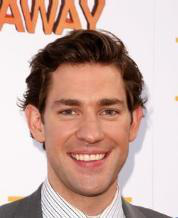

In [26]:
Image.open(img_paths[199])

In [5]:
X = np.zeros((len(img_paths), 218, 178, 3), dtype="uint8")
count = 0
for f in img_paths:
    try:
        img = Image.open(f)
        X[count] = np.array(img)
        count += 1
    except:
        print(f"Error con imagen: {count}")
        continue

In [10]:
x, x_test, y, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
del X

In [25]:
x_train = x.astype('float32')
x_valid = x_test.astype('float32')
x_train /= 255.
x_valid /= 255.
y_train = y
y_valid = y_test

In [22]:
filepath = "best_model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
earlystop = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=5, verbose=1)
ih = 218
iw = 178
model = Sequential([
    Conv2D(10, (3, 3), input_shape=(ih, iw,3), activation="relu"),
    Conv2D(10, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(10, (3, 3), activation="relu"),
    Conv2D(10, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(10, (3, 3), activation="relu"),
    Conv2D(10, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(10, (3, 3), activation="relu"),
    Conv2D(10, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(10, (3, 3), activation="relu"),
    Conv2D(10, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation="relu", kernel_regularizer=L1L2(l1=1e-5, l2=1e-4)),
    Dense(40, activation="sigmoid")
])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 216, 176, 10)      280       
                                                                 
 conv2d_6 (Conv2D)           (None, 214, 174, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 107, 87, 10)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 105, 85, 10)       910       
                                                                 
 conv2d_8 (Conv2D)           (None, 103, 83, 10)       910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 51, 41, 10)       0         
 2D)                                                  

In [27]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))
history = model.fit(x_train, y_train, batch_size=100,epochs=200, validation_data=(x_valid, y_valid), callbacks=[earlystop, checkpoint])

Epoch 1/200
400/400 [==============================] - ETA: 0s - loss: 0.1384
Epoch 1: val_loss improved from inf to 0.11925, saving model to best_model.hdf5
400/400 [==============================] - 400s 997ms/step - loss: 0.1384 - val_loss: 0.1192
Epoch 2/200
400/400 [==============================] - ETA: 0s - loss: 0.1074
Epoch 2: val_loss improved from 0.11925 to 0.10177, saving model to best_model.hdf5
400/400 [==============================] - 398s 994ms/step - loss: 0.1074 - val_loss: 0.1018
Epoch 3/200
400/400 [==============================] - ETA: 0s - loss: 0.0988
Epoch 3: val_loss improved from 0.10177 to 0.09794, saving model to best_model.hdf5
400/400 [==============================] - 406s 1s/step - loss: 0.0988 - val_loss: 0.0979
Epoch 4/200
400/400 [==============================] - ETA: 0s - loss: 0.0953
Epoch 4: val_loss improved from 0.09794 to 0.09381, saving model to best_model.hdf5
400/400 [==============================] - 407s 1s/step - loss: 0.0953 - val_los

KeyboardInterrupt: 

In [4]:
sho_path = sorted(glob(os.path.join("sho/", "*")))

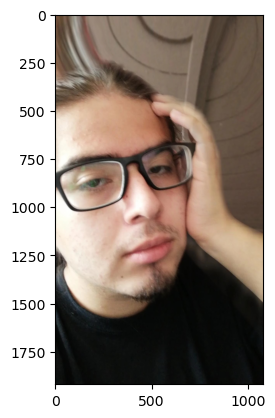

In [5]:
data_augment = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
#     vertical_flip=True,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
)
for i in range(15):
    for f in sho_path:
        img = tf.keras.utils.load_img(f)
        input_arr = tf.keras.utils.img_to_array(img, data_format="channels_last")
        input_arr = np.array([input_arr])
        augmented = data_augment.flow(
            input_arr,
            shuffle=True,
            save_to_dir="sho2",
            save_prefix='as',
            save_format='png',
        )
        plt.imshow(next(augmented)[0].astype('uint8'))

In [6]:
sho2_path = sorted(glob(os.path.join("sho2/", "*")))
total_num = len(sho_path) + len(img_paths) + len(sho2_path)
X = np.zeros((total_num, 218, 178, 3), dtype="uint8")
Y = np.zeros(total_num)
count = 0
for f in img_paths:
    try:
        img = Image.open(f)
        X[count] = np.array(img)
        Y[count] = 0
        count += 1
    except:
        print(f"Error con imagen: {count}")
        continue
for f in sho_path:
    img = Image.open(f)
    new_img = img.resize(size=(178, 218))
    X[count] = np.array(new_img)
    Y[count] = 1
    count += 1
for f in sho2_path:
    try:
        img = Image.open(f)
        new_img = img.resize(size=(178, 218))
        X[count] = np.array(new_img)
        Y[count] = 1
        count += 1
    except:
        print(f"Error con imagen: {count}")
        continue

In [7]:
x, x_test, y, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train = x.astype('float32')
x_valid = x_test.astype('float32')
x_train /= 255.
x_valid /= 255.
y_train = y
y_valid = y_test

In [8]:
model = tf.keras.models.load_model("best_model.hdf5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 216, 176, 10)      280       
                                                                 
 conv2d_6 (Conv2D)           (None, 214, 174, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 107, 87, 10)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 105, 85, 10)       910       
                                                                 
 conv2d_8 (Conv2D)           (None, 103, 83, 10)       910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 51, 41, 10)       0         
 2D)                                                  

In [9]:
from keras.models import Model
temp_model = Model(inputs=model.input, outputs=model.layers[-2].output)
model2 = Sequential()
model2.add(temp_model)
model2.add(Dense(64, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 128)               11158     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 19,479
Trainable params: 19,479
Non-trainable params: 0
_________________________________________________________________


In [10]:
filepath = "facial_recongnition_model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
earlystop = EarlyStopping(monitor='val_accuracy', mode='max', restore_best_weights=True, patience=5, verbose=1)
model2.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history = model2.fit(x_train, y_train, batch_size=100,epochs=200, validation_data=(x_valid, y_valid), 
                    callbacks=[earlystop, checkpoint])

Epoch 1/200
15/15 [==============================] - ETA: 0s - loss: 0.4264 - accuracy: 0.7535
Epoch 1: val_accuracy improved from -inf to 0.95493, saving model to facial_recongnition_model.hdf5
15/15 [==============================] - 15s 947ms/step - loss: 0.4264 - accuracy: 0.7535 - val_loss: 0.1551 - val_accuracy: 0.9549
Epoch 2/200
15/15 [==============================] - ETA: 0s - loss: 0.0952 - accuracy: 0.9718
Epoch 2: val_accuracy improved from 0.95493 to 0.97746, saving model to facial_recongnition_model.hdf5
15/15 [==============================] - 13s 896ms/step - loss: 0.0952 - accuracy: 0.9718 - val_loss: 0.0878 - val_accuracy: 0.9775
Epoch 3/200
15/15 [==============================] - ETA: 0s - loss: 0.0632 - accuracy: 0.9796
Epoch 3: val_accuracy did not improve from 0.97746
15/15 [==============================] - 13s 888ms/step - loss: 0.0632 - accuracy: 0.9796 - val_loss: 0.0655 - val_accuracy: 0.9775
Epoch 4/200
15/15 [==============================] - ETA: 0s - lo

In [10]:
model = tf.keras.models.load_model("facial_recongnition_model.hdf5")

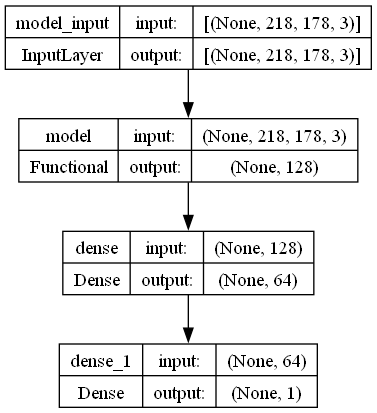

In [11]:
keras.utils.plot_model(model, "model.png", show_shapes=True) 

In [12]:
model = tf.keras.models.load_model("best_model.hdf5")

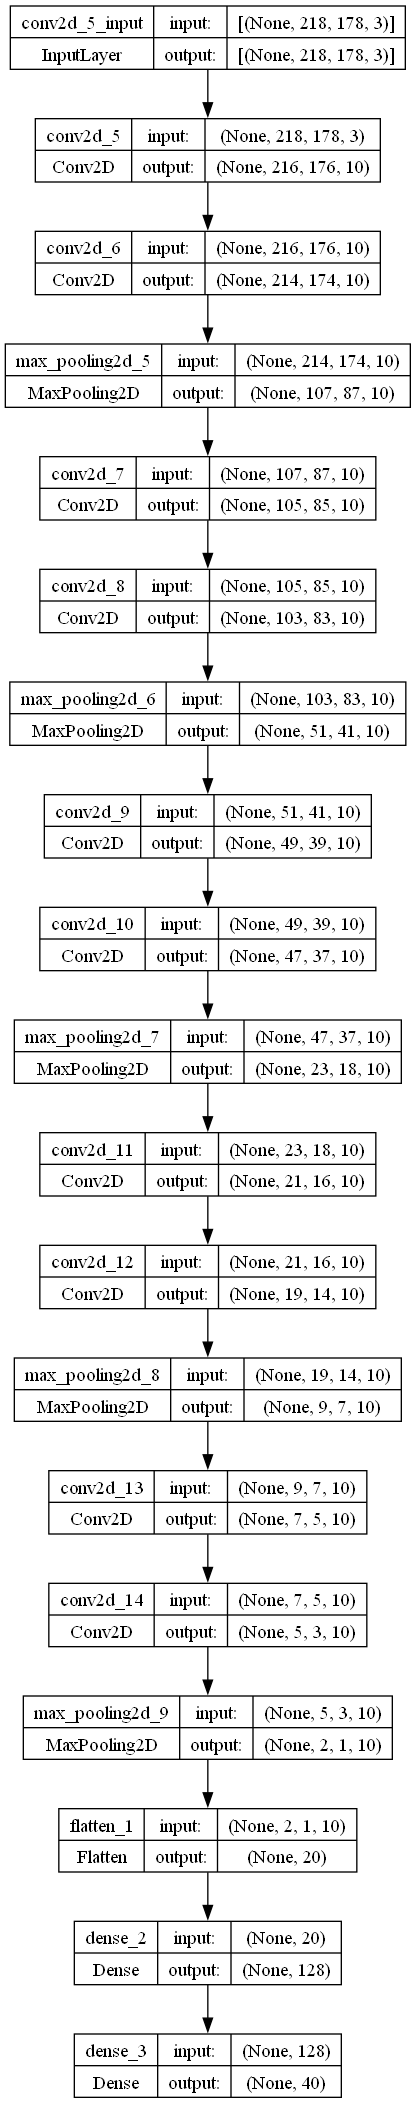

In [13]:
keras.utils.plot_model(model, "1model.png", show_shapes=True) 